<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/SistemasdeRecomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Popularity
* Content-based
* Colaborative:
  * User-based
  * Item-based

## Motor de recomendación de repositorios de Github

# Método 1: User-Based

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/users.csv')
print(df_users.head())

   userId     username                  name
0       1     iris9112  Isabel Ruiz Buriticá
1       2  dianaclarke                 Diana
2       3  nateprewitt          Nate Prewitt
3       4       oldani       Ordanis Sanchez
4       5   waflessnet            waflessnet


In [ ]:
df_repos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/repos.csv')
print(df_repos.head())

   repoId  ...    stars
0       1  ...      NaN
1       2  ...  85800.0
2       3  ...  80855.0
3       4  ...  78761.0
4       5  ...  53909.0

[5 rows x 4 columns]


In [ ]:
df_ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/ratings.csv')
print(df_ratings.head())

   userId  repoId  rating
0       1       1       2
1       1       2       3
2       1       3       4
3       1       4       5
4       1       5       3


In [ ]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_items) + ' items (repositorios)')

30 users
167 items (repositorios)


Text(0, 0.5, 'Valoraciones')

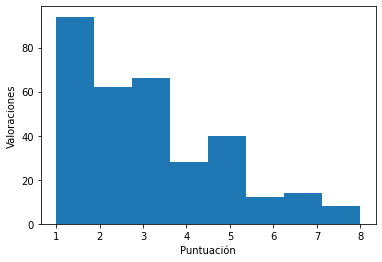

In [ ]:
plt.hist(df_ratings.rating, bins=8)
plt.xlabel('Puntuación')
plt.ylabel('Valoraciones')

In [ ]:
df_ratings.groupby(['rating'])['userId'].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

Text(0, 0.5, 'Repositorios')

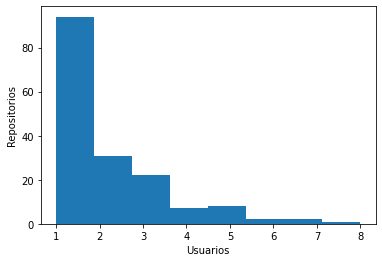

In [ ]:
plt.hist(df_ratings.groupby(['repoId'])['repoId'].count(), bins=8)
plt.xlabel('Usuarios')
plt.ylabel('Repositorios')

In [ ]:
#Matriz usuarios/rating

df_matrix = pd.pivot_table(df_ratings,
                           values='rating',
                           index='userId',
                           columns='repoId').fillna(0)
df_matrix                           

repoId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,3.0,1.0,5.0,1.0,0.0,4.0,2.0,1.0,1.0,8.0,5.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Porcentaje de sparsity

ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.43%


In [ ]:
ratings_train, ratings_test = train_test_split(ratings, 
                                               test_size=0.2, 
                                               random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(24, 167)
(6, 167)


In [ ]:
#Matriz de similitud: distancias por Coseno

sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

(30, 30)


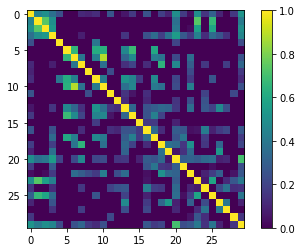

In [ ]:
plt.imshow(sim_matrix)
plt.colorbar()
plt.show()

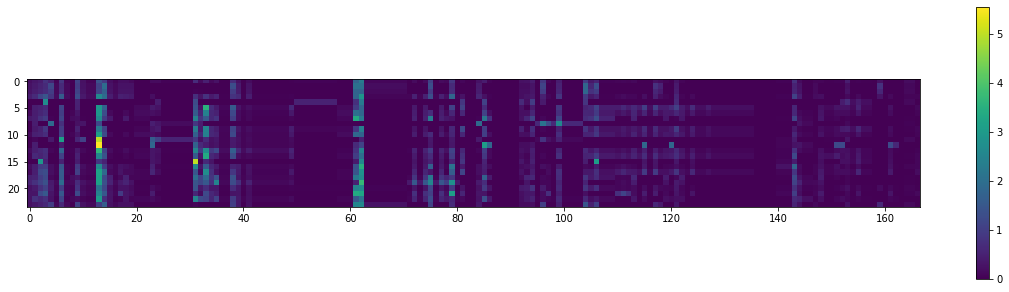

In [ ]:
# Predicciones o sugerencias

sim_matrix_train = sim_matrix[0:24, 0:24]
sim_matrix_test = sim_matrix[24:30, 24:30]

users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions)
plt.colorbar()
plt.show()

#La barra son las puntuaciones

In [ ]:
USUARIO_EJEMPLO = 'jbagnato'
data = df_users[df_users['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] - 1

user0 = users_predictions.argsort()[usuario_ver]

#Predict 3 recomendados
for i, aRepo in enumerate(user0[-3:]):
  selRepo = df_repos[df_repos['repoId'] == (aRepo + 1)]
  print(selRepo['title'], 'puntaje: ', users_predictions[usuario_ver][aRepo])

23    ansible / ansible
Name: title, dtype: object puntaje:  1.6300984296308052
6    pallets / flask
Name: title, dtype: object puntaje:  3.124047243895186
13    python / cpython
Name: title, dtype: object puntaje:  4.998475590232298


In [ ]:
#Validando el error (mse)

def get_mse(preds, actuals):
  if preds.shape[1] != actuals.shape[1]:
    actuas = actuals.T
  preds = preds[actuals.nonzero()].flatten()
  actuals = actuals[actuals.nonzero()].flatten()
  return mean_squared_error(preds, actuals)

mse_train = get_mse(users_predictions, ratings_train)
print(mse_train)

#Realizando predicciones
users_predictions_test = sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
users_predictions_test = users_predictions_test[24:30, :]

mse_test = get_mse(users_predictions_test, ratings_test)
print(mse_test)

4.881390769333358
8.902416522040543


# Método 2: Nearest Neighbors

In [ ]:
k = 8
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

In [ ]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train,
                                                    return_distance=True)
top_k_distances.shape

(24, 8)

In [ ]:
top_k_distances[usuario_ver]

array([ 0.        ,  7.14142843, 10.19803903, 11.70469991, 11.95826074,
       12.04159458, 12.80624847, 12.84523258])

In [ ]:
top_k_users.shape

(24, 8)

In [ ]:
res = top_k_users[usuario_ver]
res

array([11, 10, 12,  2,  0,  4,  6,  8])

In [ ]:
for a_index in res:
  print(df_users[df_users['userId'] == (a_index + 1)])

    userId  username                  name
11      12  jbagnato  Juan Ignacio Bagnato
    userId          username                name
10      11  davidmartinezros  David Martínez Ros
    userId         username                                name
12      13  otromaximiliano  Lindolfo Maximiliano Ayala Aguirre
   userId     username          name
2       3  nateprewitt  Nate Prewitt
   userId  username                  name
0       1  iris9112  Isabel Ruiz Buriticá
   userId    username        name
4       5  waflessnet  waflessnet
   userId username     name
6       7  elswork  elswork
   userId      username         name
8       9  camiloyate09  Camilo Yate


In [ ]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):
  users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [ ]:
users_predicts_k.shape

(24, 167)

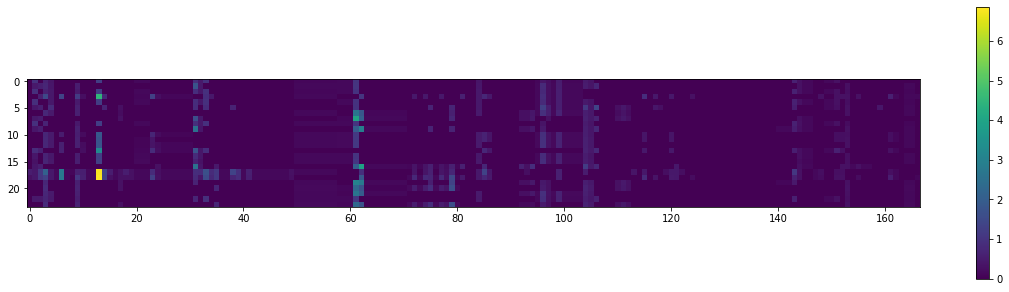

In [ ]:
plt.imshow(users_predicts_k)
plt.colorbar()
plt.show()

In [ ]:
user0 = users_predicts_k.argsort()[usuario_ver][-4:]
# 4 con mayor puntaje en la predict para este usuario

for aRepo in user0:
  selRepo = df_repos[df_repos['repoId'] == (aRepo + 1)]
  print(selRepo['title'], 'puntaje:', users_predicts_k[usuario_ver][aRepo])


3    torvalds / linux
Name: title, dtype: object puntaje: 0.7650751317565533
96    ageitgey / face_recognition
Name: title, dtype: object puntaje: 0.9455493189213428
61    jbagnato / machine-learning
Name: title, dtype: object puntaje: 1.1391214880344167
13    python / cpython
Name: title, dtype: object puntaje: 1.7626895190966168


In [ ]:
get_mse(users_predicts_k, ratings_train)

8.320332840372219

In [ ]:
get_mse(users_predicts_k, ratings_test)

11.169263185396659

# Método 3: collaborative filtering basado en items

In [ ]:
n_repos = ratings_train.shape[1]
n_repos

167

In [ ]:
neighbors = NearestNeighbors(n_repos, 'cosine')
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=167, p=2,
                 radius='cosine')

In [ ]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T,
                                                    return_distance=True)
top_k_distances.shape

(167, 167)

In [ ]:
top_k_items

array([[  0,  18,  15, ...,  61,  62,  13],
       [  1, 144,  19, ...,  61,  62,  13],
       [  2,   0, 148, ...,  62,  61,  13],
       ...,
       [164, 165,  83, ...,  61,  62,  13],
       [164, 165,  83, ...,  61,  62,  13],
       [166,  83,  90, ...,  61,  62,  13]])

In [ ]:
data = df_repos[df_repos['title'] == 'jbagnato / machine-learning']
repo_ver = data.iloc[0]['repoId'] - 1
repo_ver

61

In [ ]:
df_repos[df_repos['repoId'].isin([repo_ver + 1])]

,repoId,title,categories,stars
61,62,jbagnato / machine-learning,"Código Python, Jupyter Notebooks, archivos csv...",48.0


In [ ]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

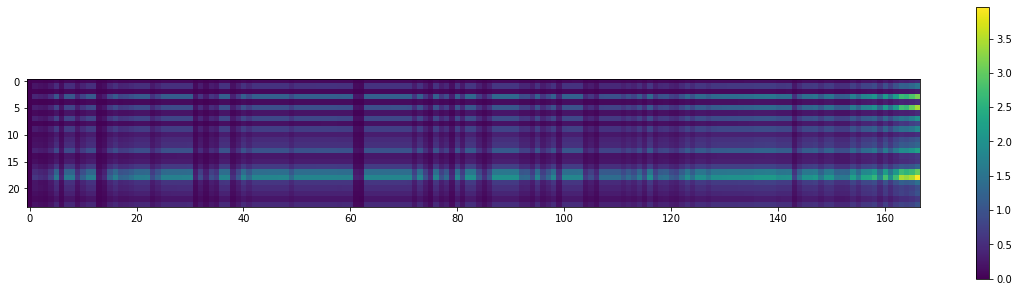

In [ ]:
plt.imshow(item_preds)
plt.colorbar()
plt.show()

In [ ]:
user0 = item_preds.argsort()[usuario_ver]

# 3 con mayor puntaje
for aRepo in user0[-3:]:
  selRepo = df_repos[df_repos['repoId'] == (aRepo + 1)]
  print(selRepo['title'], 'puntaje:', item_preds[usuario_ver][aRepo])

163    MaximAbramchuck / awesome-interview-questions
Name: title, dtype: object puntaje: 0.9354505838881774
165    OWASP / CheatSheetSeries
Name: title, dtype: object puntaje: 0.9659861021462708
166    explosion / spaCy
Name: title, dtype: object puntaje: 1.0694109007146375


In [ ]:
get_mse(item_preds, ratings_train)

10.409560990974724

In [ ]:
get_mse(item_preds, ratings_test)

10.942479094153391

# Método 4: recomendación por correlación

In [ ]:
average_rating = pd.DataFrame(df_ratings.groupby('repoId')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df_ratings.groupby('repoId')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
repoId,,
14,8,8
63,7,7
62,7,7
34,6,6
32,6,6


In [ ]:
mi_repo_ratings = df_matrix[62]
similar_to_me = df_matrix.corrwith(mi_repo_ratings)
corr_mine = pd.DataFrame(similar_to_me, columns=['pearsonR'])
corr_mine.dropna(inplace=True)
corr_sumary = corr_mine.join(average_rating['rating'])
corr_sumary[corr_sumary['rating'] >= 1].sort_values('pearsonR', 
                                                    ascending=False).head()

,pearsonR,rating
repoId,,
62,1.000000,7
87,0.341515,3
92,0.341515,3
95,0.341515,3
139,0.336601,1


In [ ]:
#Recomendado
df_repos[df_repos['repoId'] == 92]

,repoId,title,categories,stars
91,92,joanby / python-ml-course,Curso de Introducción a Machine Learning con P...,156.0


# Método 5: Repo más popular -sin collaborative filtering-

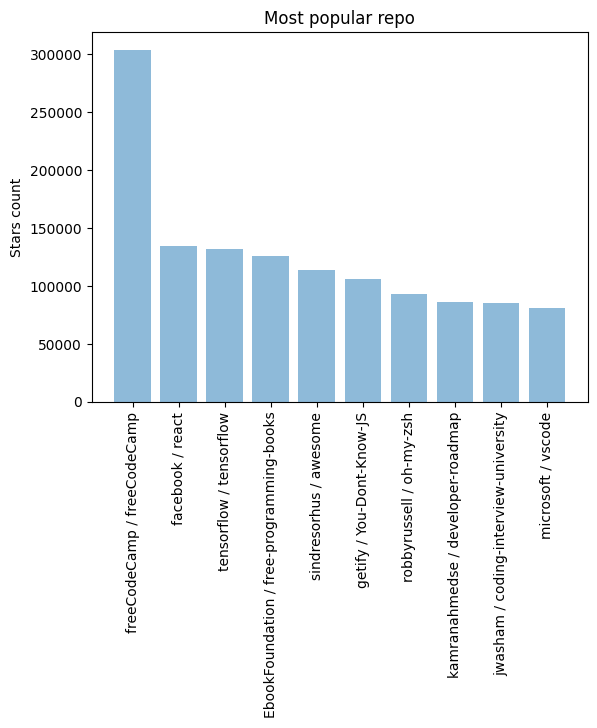

In [ ]:
popular_repo = df_repos[['title', 'stars']].groupby('stars').sum().reset_index()
popular_repo_top_20 = popular_repo.sort_values('stars', ascending=False).head(n=10)

plt.rcdefaults()

objects = (list(pupolar_repo_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_repo_top_20['stars'])

plt.bar(y_pos, 
        performance, 
        align='center',
        alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Stars count')
plt.title('Most popular repo')
plt.show()